# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
url = f"{url}units={units}&appid={api_key}"

# List for holding weather data
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

#Loop to collect data set for each city's weather information 
for city in cities:  
    try:
        response = requests.get(f"{url}&q={city}").json() 
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        maxtemp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        cityrecord = response["name"]
        print(f"City Name: {city}")
    # Loop stopped as soon as cities randomly generated from above code are not found in the Openweathermap.
    # Had to put try, except, and continue since some cities are not in the Openweathermap data base 
    # Source: https://stackoverflow.com/questions/1843659/how-to-get-back-to-the-for-loop-after-exception-handling
    except: print("Weather information for some cities are not available. Searching for the next available city.")
        
    continue   



City Name: evensk
City Name: barrow
City Name: luanda
City Name: carnarvon
City Name: mar del plata
City Name: saskylakh
Weather information for some cities are not available. Searching for the next available city.
City Name: yerbogachen
Weather information for some cities are not available. Searching for the next available city.
City Name: byron bay
City Name: busselton
City Name: victoria
City Name: talnakh
City Name: cockburn town
City Name: bluff
City Name: kungurtug
City Name: mataura
City Name: bambous virieux
City Name: butaritari
Weather information for some cities are not available. Searching for the next available city.
City Name: mizan teferi
City Name: qaanaaq
City Name: kaitangata
City Name: sao joao da barra
City Name: punta arenas
City Name: hobart
City Name: rikitea
City Name: albany
City Name: thompson
City Name: vaini
City Name: alice springs
City Name: kruisfontein
City Name: oussouye
City Name: yellowknife
City Name: mackay
City Name: kapaa
City Name: port elizabeth

City Name: upernavik
City Name: sampit
City Name: umm bab
City Name: miri
City Name: cayenne
City Name: lasa
City Name: alexandria
City Name: port alfred
Weather information for some cities are not available. Searching for the next available city.
City Name: lompoc
City Name: arlit
City Name: hamilton
City Name: cascais
City Name: kavaratti
City Name: grindavik
City Name: kavieng
City Name: porto velho
Weather information for some cities are not available. Searching for the next available city.
Weather information for some cities are not available. Searching for the next available city.
City Name: sheridan
Weather information for some cities are not available. Searching for the next available city.
City Name: visby
City Name: saryozek
Weather information for some cities are not available. Searching for the next available city.
City Name: luganville
City Name: cordoba
City Name: calabazar de sagua
City Name: los llanos de aridane
City Name: itanhem
City Name: gondanglegi
City Name: ilul

City Name: ayagoz
City Name: bosaso
Weather information for some cities are not available. Searching for the next available city.
Weather information for some cities are not available. Searching for the next available city.
City Name: katsina
City Name: torres
City Name: morondava
Weather information for some cities are not available. Searching for the next available city.
City Name: alapur
City Name: kapit
City Name: erdotelek
City Name: lashio
City Name: mabaruma
City Name: condega
City Name: berck
City Name: te anau
City Name: kysyl-syr
Weather information for some cities are not available. Searching for the next available city.
Weather information for some cities are not available. Searching for the next available city.
City Name: ayan
City Name: rurrenabaque
City Name: ko samui
Weather information for some cities are not available. Searching for the next available city.
City Name: santa lucia
City Name: karpogory
City Name: talcahuano
City Name: tigil
City Name: presidencia roque 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Make column
weather_columns = {"City": cityname, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity": humidity, "Lat":lat, 
                  "Lng":lng, "Max Temp": maxtemp, "Wind Speed":windspeed}

# Create csv
cities_weather = pd.DataFrame(weather_columns)
cities_weather.to_csv('C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/Instructions/starter_code/cities_weather.csv')
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Evensk,0,RU,1570044889,53,61.92,159.24,27.89,9.13
1,Barrow,0,AR,1570044889,53,-38.31,-60.23,49.40,10.19
2,Luanda,75,AO,1570044889,83,-8.83,13.24,77.00,9.17
3,Carnarvon,0,ZA,1570044813,18,-30.97,22.13,59.43,8.16
4,Mar del Plata,92,AR,1570044809,22,-46.43,-67.52,53.72,10.47


In [5]:
# Number of City Record
len(cities_weather['City'])
# 61 Cities not in the Openweathermap data base

550

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

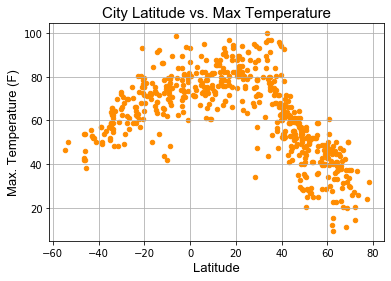

In [6]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Max Temp"], marker="o", s=20, color="darkorange")
plt.title("City Latitude vs. Max Temperature",fontname="Arial",fontsize=15)
plt.ylabel("Max. Temperature (F)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/LatitudevsTemperature.png")

#### Latitude vs. Humidity Plot

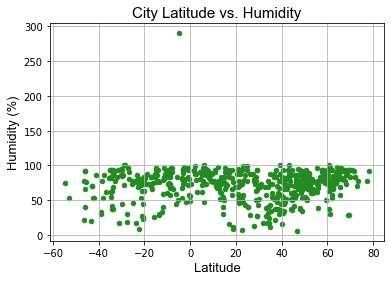

In [7]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Humidity"], marker="o", s=20, color="forestGreen")
plt.title("City Latitude vs. Humidity",fontname="Arial",fontsize=15)
plt.ylabel("Humidity (%)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/LatitudevsHumidity.png")

#### Latitude vs. Cloudiness Plot

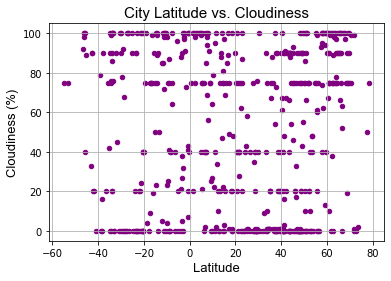

In [8]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Cloudiness"], marker="o", s=20, color="purple")
plt.title("City Latitude vs. Cloudiness",fontname="Arial",fontsize=15)
plt.ylabel("Cloudiness (%)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/LatitudevsCloudiness.png")

#### Latitude vs. Wind Speed Plot

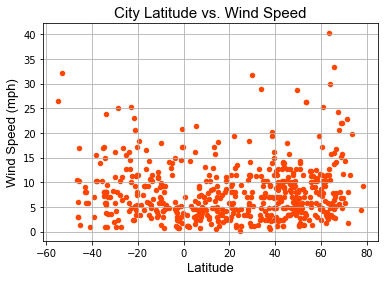

In [9]:
# Build a scatter plot for each data type
plt.scatter(cities_weather["Lat"], cities_weather["Wind Speed"], marker="o", s=20, color="orangered")
plt.title("City Latitude vs. Wind Speed",fontname="Arial",fontsize=15)
plt.ylabel("Wind Speed (mph)",fontname="Arial",fontsize=13)
plt.xlabel("Latitude",fontname="Arial",fontsize=13)
plt.grid(True)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_06_Python_APIs/LatitudevsWindSpeed.png")